In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
%matplotlib inline

i) Given our initial distribution:

$f(\epsilon;T)d\epsilon = C\frac{\epsilon^2d\epsilon}{\exp{(\epsilon/kT)}-1}$

we first make a change in variables $\epsilon' = \epsilon/kT$.

This results in the distribution

$f(\epsilon')d\epsilon' = A\frac{\epsilon'^2d\epsilon'}{\exp{(\epsilon')}-1}$

where $A=C(kT)^2$.

ii) We now need to find where this function is a maximum numerically.

In [2]:
def f(eps):
    return eps**2/(np.exp(eps)-1)
def fm(eps):
    return -f(eps)

In [3]:
x0 = 1.0
res = optimize.minimize(fm,x0,method='nelder-mead',options={'xtol':1e-8,'disp':True})
print res
print "f(eps_max) = ",f(res.x)

Optimization terminated successfully.
         Current function value: -0.647610
         Iterations: 29
         Function evaluations: 59
  status: 0
    nfev: 59
 success: True
     fun: -0.64761023789191496
       x: array([ 1.59362426])
 message: 'Optimization terminated successfully.'
     nit: 29
f(eps_max) =  [ 0.64761024]


The function is maximized at $\epsilon'\approx1.594$.

iii) We will now renomralize our function by dividing by $f(\epsilon=1.594) \approx 0.6476$.

$f'(\epsilon')d\epsilon' = B\frac{\epsilon'^2d\epsilon'}{\exp{(\epsilon')}-1}$

where $B = A/0.6476$.

In [4]:
def fp(eps):
    return f(eps)/f(res.x)

iv) Here is a function that returns a photon of energy between $\epsilon_1'=0.1$ and $\epsilon_2'=5.0$.

In [10]:
def en():
    lo,hi = 0.1,5.0
    return np.random.rand()*(hi-lo)+lo

v) Now, we make repeated draws to en(), $e$, as well as many draws from the RNG, $r$. When $r_i>f(e_i)$ then the photon is rejected. Otherwise it is accepted. We do this for $N=100000$ photons.

In [6]:
N = 1000000
N_accepted = 0
N_rejected = 0

acc,facc = [],[]

for i in range(N):
    e = en()   #energy
    fe = fp(e) #f(energy)
    r = np.random.rand() #RNG call between 0 and 1
    if r>fe:
        N_rejected+=1
    else:
        N_accepted+=1
        acc.append(e)
        facc.append(fe)
    continue

print N_accepted, N_rejected, N

676475 323525 1000000


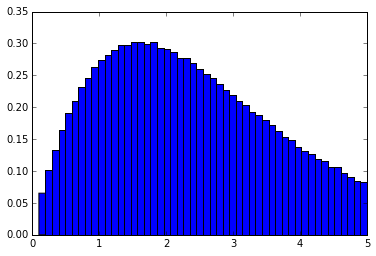

In [14]:
plt.hist(acc,bins=50,normed=True)
plt.gcf().savefig("submission/HW1_3_6_normalized.png")

iv) This technique is now generalized to probe the distribution at a given energy. This is contained in the following function.

In [8]:
def D_f(eps):
    N = 10000
    N_accepted = 0.0
    fe = fp(eps)
    for i in range(N):
        r = np.random.rand()
        if r<fe:
            N_accepted+=1.0
    return N_accepted/N

Loop over all energies in small steps $d\epsilon'$ and plot the distribution.

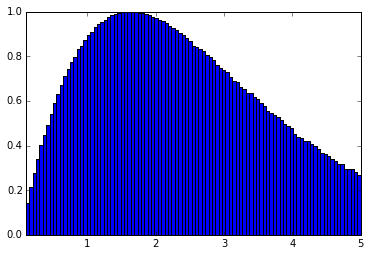

In [16]:
energies = np.linspace(0.1,5.0,100)
Dist = []
for e in energies:
    Dist.append(D_f(e))
plt.bar(energies,Dist,width = energies[1]-energies[0])
plt.xlim(0.1,5.0)
plt.gcf().savefig("submission/HW1_3_6.png")

Hey hey badabing.